In [1]:
import earthkit.hydro as ekh
import numpy as np
import matplotlib.pyplot as plt

network = ekh.river_network.load("efas", "5", use_cache=False)

Cache disabled.


# Distances and Lengths

Computing how far points on a river network are from each other is a common task, facilitated by the `distance` and `length` submodules.

## Lengths

Lengths are the sum of all lengths per node/gridcell, including at the sources. By default, lengths are assumed to be unit lengths, giving the length in terms of number of gridcells. Either a maximum or minimum length can be found, in either the upstream or downstream direction, or both (undirected lengths).

Numerous start locations can be specified in which case the algorithm returns the minimum/maximum length starting from any of the start locations.

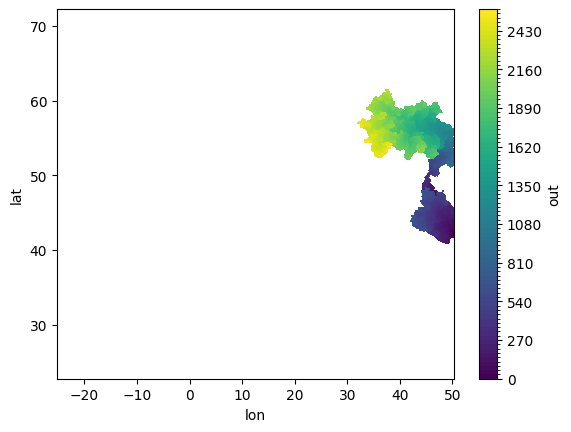

In [2]:
da = ekh.length.min(network, locations = {
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}, upstream=True, downstream=False)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

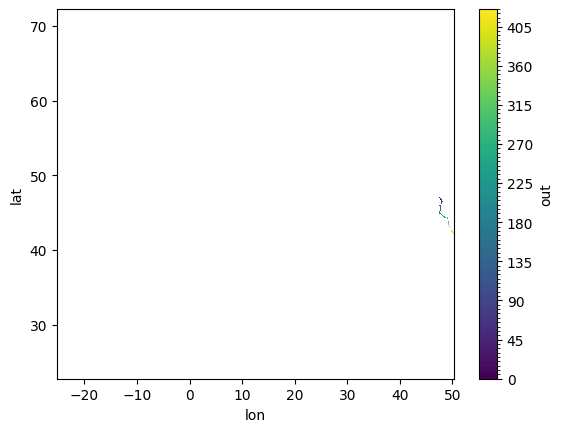

In [3]:
da = ekh.length.min(network, locations = {
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}, upstream=False, downstream=True)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

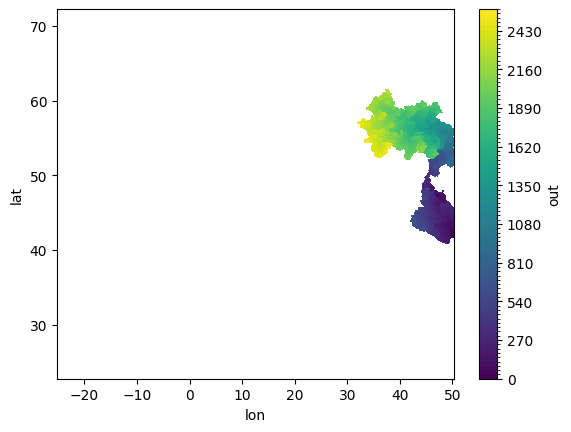

In [4]:
da = ekh.length.min(network, locations = {
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}, upstream=True, downstream=True)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

Custom node/gridcell lengths can of course also be specified.

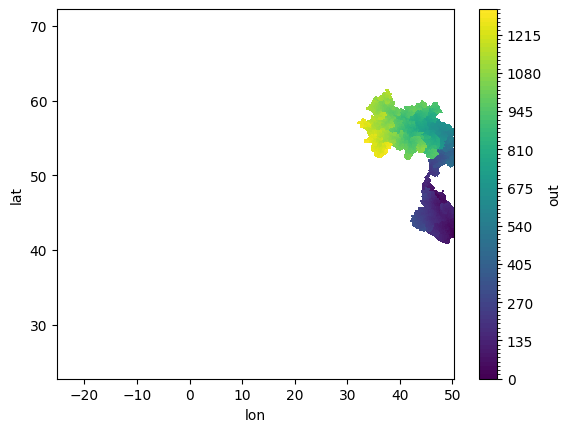

In [5]:
pixel_lengths = np.random.rand(*network.shape)

da = ekh.length.min(network, locations = {
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}, field=pixel_lengths, upstream=True, downstream=True)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

## Distances

Distances are similar to lengths, but are computed by summing the edge distances starting from the source nodes. Again, unit distances are assumed for each edge.

In practice, this means that with default behaviour the distance at each point will be one fewer than the length because there is one fewer edge per path compared to the number of nodes.

In [6]:
locations  = {
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}

np.all(ekh.distance.array.min(network, locations, return_type="masked") == ekh.length.array.min(network, locations, return_type="masked") - 1)

np.True_

Of course, upstream, downstream, undirected and arbitrary weights are all also possible.

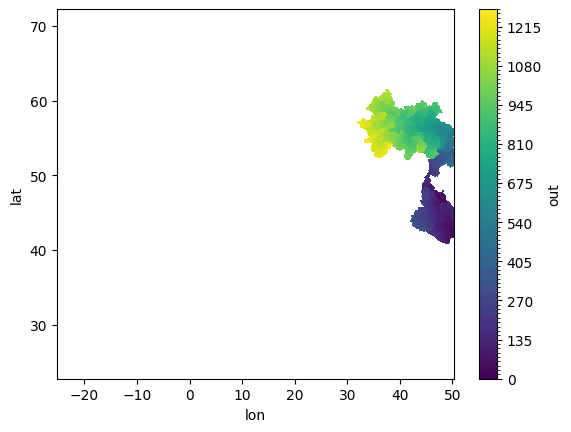

In [7]:
edge_weights = np.random.rand(network.n_edges)

da = ekh.distance.min(network, locations, field = edge_weights, upstream=True, downstream=True)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

## Convenience functions

It is common to find distances to sources or sinks, so these methods are provided for convenience. Both longest and shortest paths are supported.

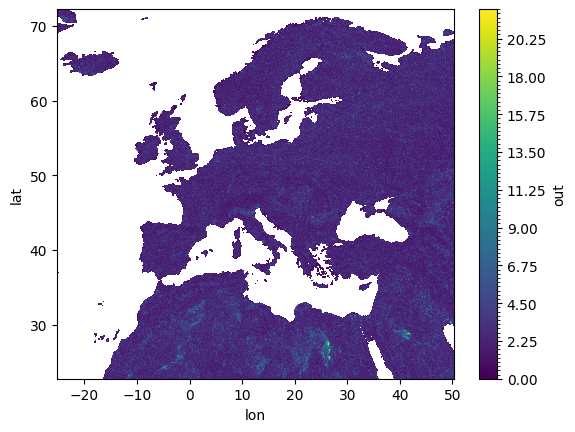

In [8]:
edge_weights = np.random.rand(network.n_edges)

da = ekh.distance.to_source(network, field = edge_weights, path="shortest")

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

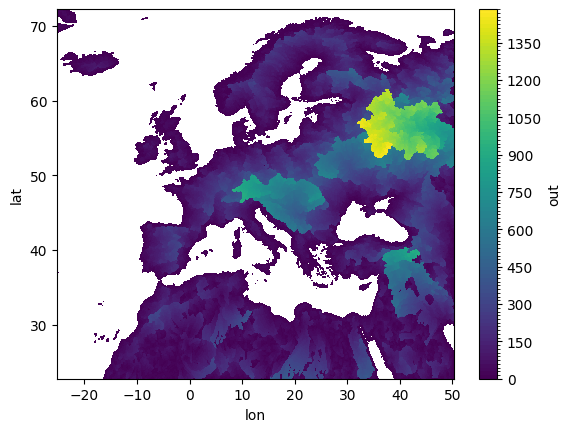

In [9]:
edge_weights = np.random.rand(network.n_nodes)

da = ekh.length.to_sink(network, field = edge_weights, path="longest")

da.plot.contourf(cmap="viridis", levels=100)
plt.show()